# 1. Predicting Parkinson's Disease
## 1.1. Introduction
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

## 1.2 Context
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a medical professional.

## 1.3 Domain: Healthcare

## 1.4 Dataset Description
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

- from [UCI Machine Learning Library, Parkinson's Dataset](https://archive.ics.uci.edu/ml/datasets/parkinsons)

## 1.5 Attribute Information
 - name - ASCII subject name and recording number
 - MDVP:Fo(Hz) - Average vocal fundamental frequency
 - MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
 - MDVP:Flo(Hz) - Minimum vocal fundamental frequency
 - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
 - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
 - NHR,HNR - Two measures of ratio of noise to tonal components in the voice
 - status - Target Variable. Health status of the subject (one) - Parkinson's, (zero) - healthy
 - RPDE,D2 - Two nonlinear dynamical complexity measures
 - DFA - Signal fractal scaling exponent
 - spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)
 
## 1.6 Objectives
The aim of is to classify the patients into the respective labels using the attributes from their voice recordings.

  - Exploratory Data Analysis
  - Supervised Learning
  - Ensemble Learning

# 2. Exploratory Data Analysis
## 2.1 Loading the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Read the data:
data = pd.read_csv('Parkinsons.csv')
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

In [3]:
data.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
190             0.405       0.02336       0.02498   0.02745      0.07008   
191             0.263       0.01604       0.01657   0.01879      0.04812   
192             0.256       0.01268       0.01365   0.01667      0.03804   
193             0.241       0.01265       0.01321   0.01588      0.03794   
194             0.190       0.01026       0.01161   0.01373      0.03078   

         NHR     HNR  status      RPDE       DFA   spread1   spread2  \
190  0.02764  19.517       0  0.448439  0.657899 -6.538586  0.121952   
191  0.01810  19.147       0  0.431674  0.683244 -6.195325  0.129303   
192  0.10715  17.883       0  0.407567  0.655683 -6.787197  0.158453   
193  0.07223  19.020       0  0.451221  0.643956 -6.744577  0.207454   
194  0.04398  21.209       0  0.462803  0.664357 -5.724056  0.190667   

           D2       PPE  
190  2.657476  0.133050  
191  2.784312  0.168895  
192  2.679772  0.131728  
193  2.138608  0.123306  
194  2.555477  0.148569

- Based on the examination of the dataset and the source file, there are no missing, 'Null' or '0' values in the data.
- We will need to standardize our dataset to effectively train the classifiers.

In [4]:
# Let's look at the shape of the dataset
data.shape

(195, 24)

The dataset is very small containing only 195 entries. Let's investigate further to see if the relative scarcity of the data has any effect on our classifier models.

In [5]:
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

There is no missing data in the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
# The 'name' value will not be important feature, so we will exclude it from further analysis.
data.drop('name', axis = 1, inplace = True)
data.shape

(195, 23)

In [8]:
# Let's check the distribution of the target variable.
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In this dataset, there are more patients with positive for Parkinson's Disease than not.

In [9]:
data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

## 2.2 Data Preparation

In [10]:
# We would like to cast the target variable as categorical ('1': Parkinsons +ve, '0': Parkinsons -ve) for further analysis.
data['status'] = data['status'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null category
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null 

In [11]:
predictors = data.select_dtypes(include='number')
labels = data.select_dtypes(include='category')
print(f'Predictors: {list(predictors.columns)}')
print(f'Labels: {list(labels.columns)}')

Predictors: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Labels: ['status']


## 2.3 Data Visualization
Let's explore the dateset vialually to understand the nature, shape and distribution of various attributes, find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why.
### 2.3.1 Univariate Analysis

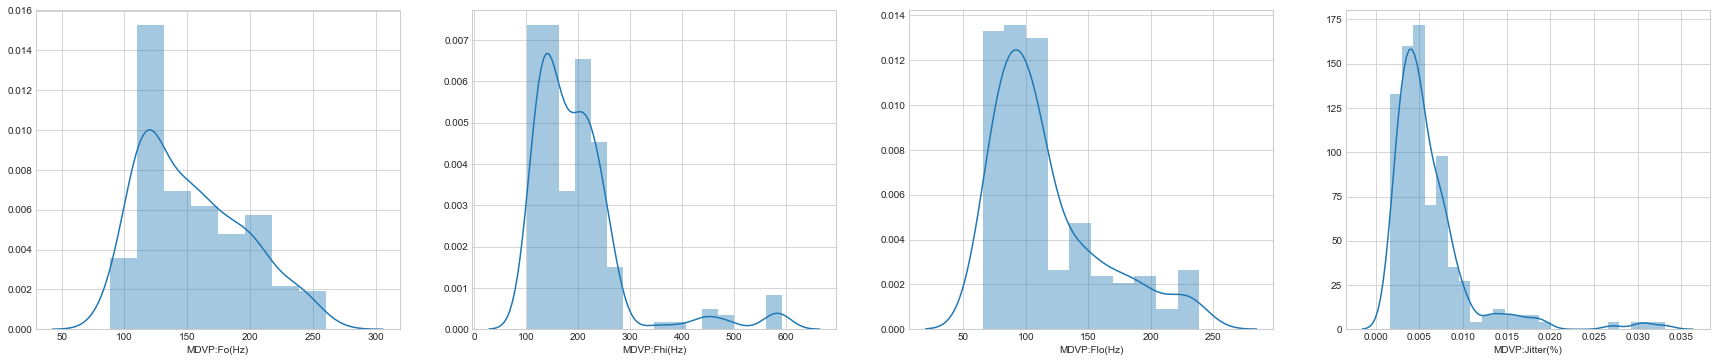

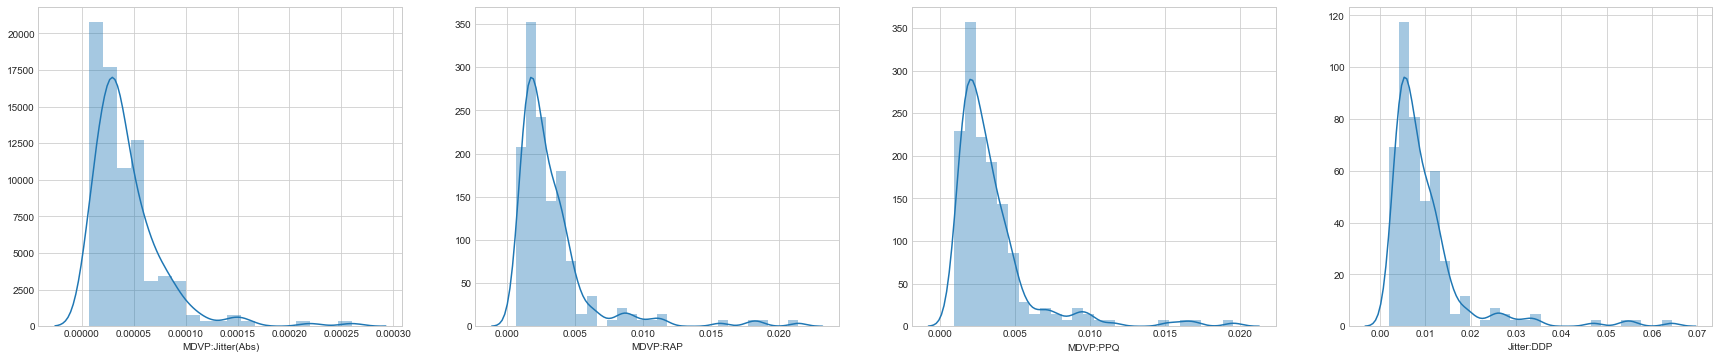

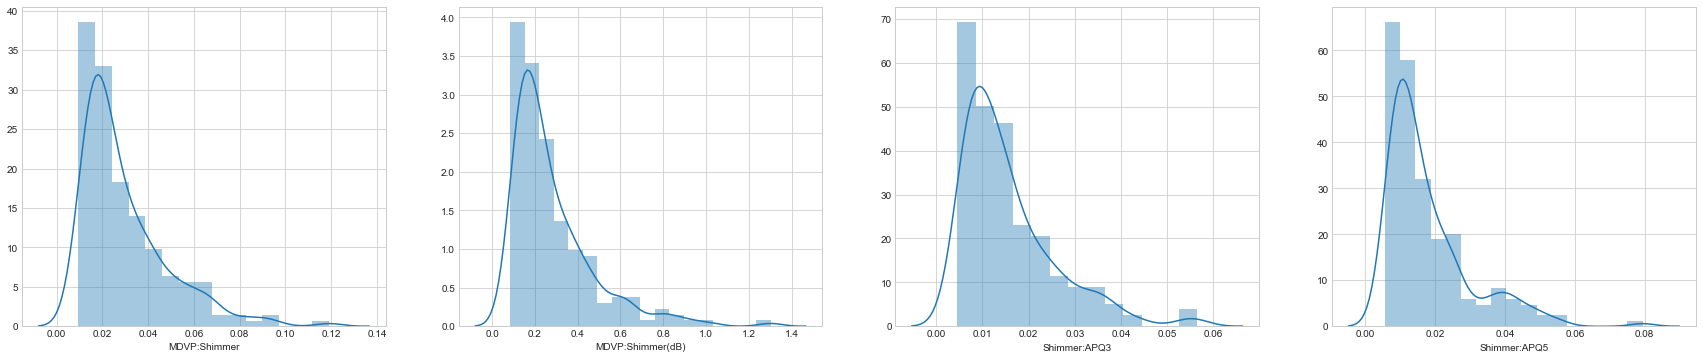

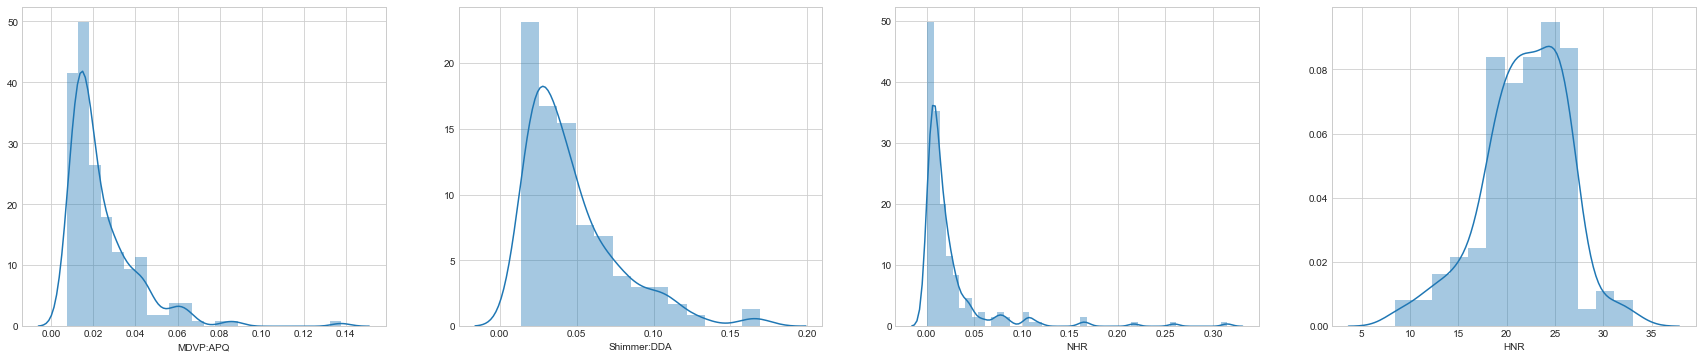

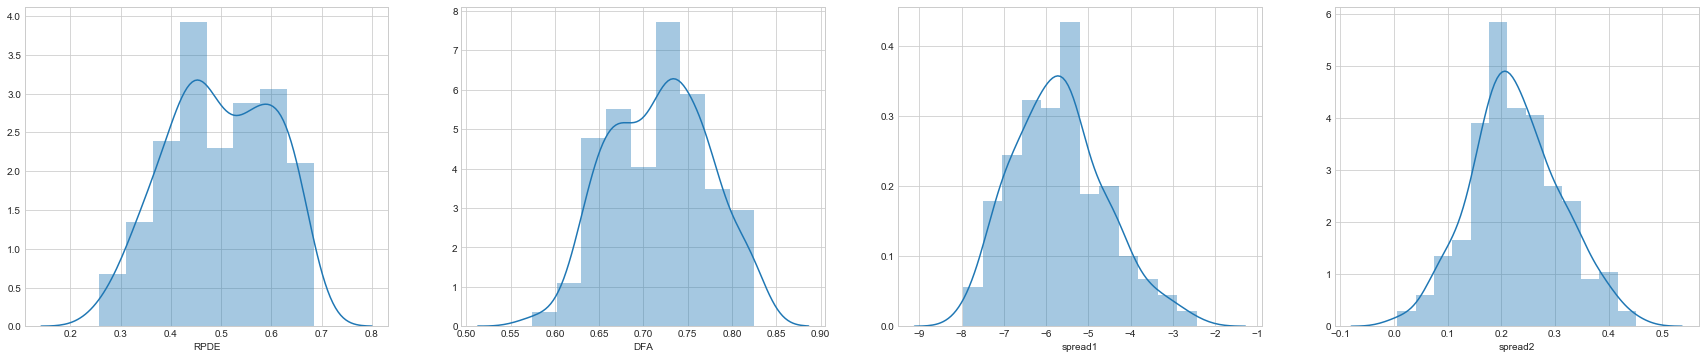

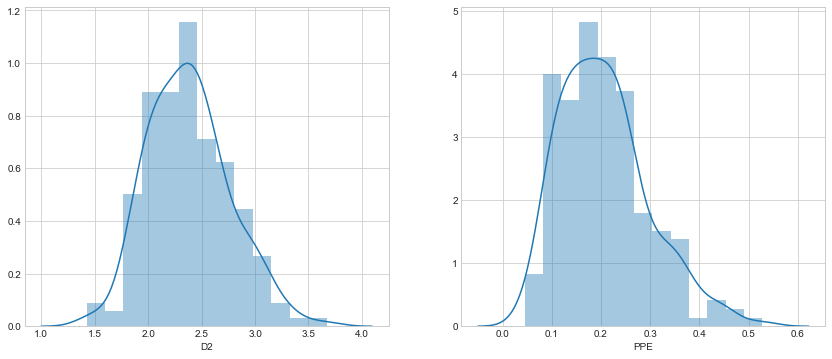

In [12]:
# Let's check the distribution of all the predictors to understand the nature of the data.

pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in predictors.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    if pos == 1:
        plt.figure(figsize= (30,20))  # Set the figure size
        
    plt.subplot(3, 4, pos)   # plot grid
    sns.distplot(predictors[feature], kde= True )
    pos += 1  # to plot over the grid one by one  
    if pos > 4:
        pos = 1

- Feature <b>MDVP:Fo(Hz)</b> is slightly left skewed and there is no extreme/outlier value. Most of values are between 125 to 150. Mean is very close to median.
- Features <b>MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, PPE</b> are right skewed and there are outlier values.
- Feature <b>HNR</b> is left skewed and there are outlier values.
- Features <b>RPDE, DFA</b> are left skewed and there is no outlier value.
- Features <b>spread1, spread2, D2</b> looks normally distributed but thee are few outlier values.

In [13]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Mdvp:fo(hz) Attribute:
Mdvp:fo(hz)(min) : 88.333
Q1                    : 117.572
Q2(Median)            : 148.79
Q3                    : 182.769
Mdvp:fo(hz)(max) : 260.105


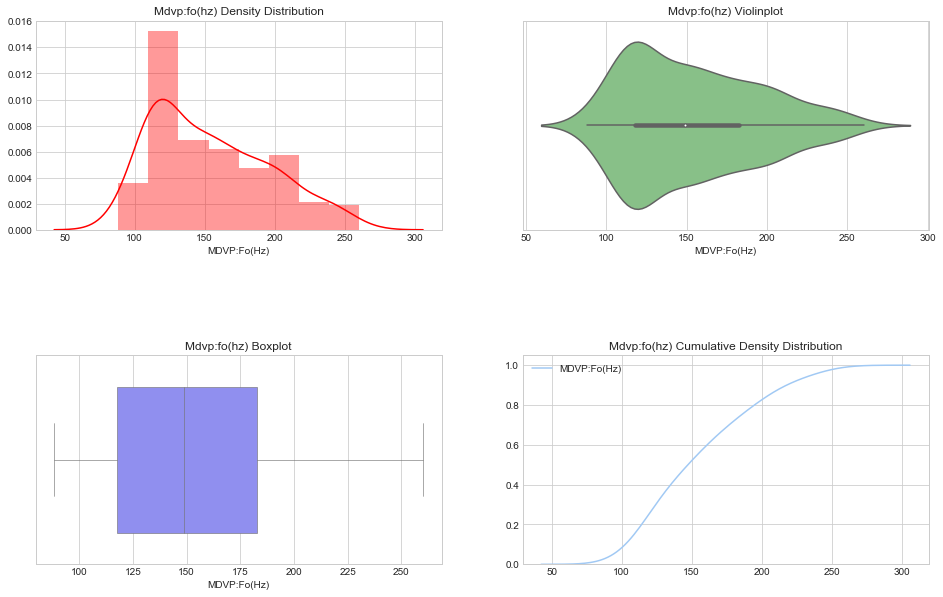

In [14]:
# Let's check the distribution of the more prominent variables more closely:
# MDVP:Fo(Hz) - is a measure of Average vocal fundamental frequency of the subject.
summary('MDVP:Fo(Hz)')

 - MDVP:Fo(Hz) - is slightly left skewed, and there are no extreme outlier values.

5 Point Summary of Mdvp:flo(hz) Attribute:
Mdvp:flo(hz)(min) : 65.476
Q1                    : 84.291
Q2(Median)            : 104.315
Q3                    : 140.01850000000002
Mdvp:flo(hz)(max) : 239.17


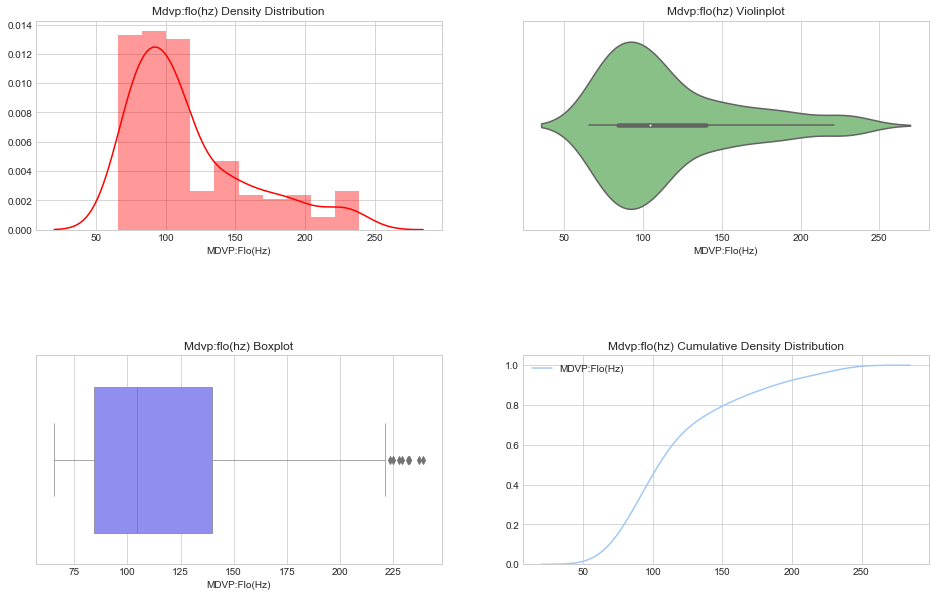

In [15]:
# MDVP:Flo(Hz) - is the Minimum vocal fundamental frequency of the subject.
summary('MDVP:Flo(Hz)')

 - MDVP:Flo(Hz) is left - skewed with a median of 104.315 Hz, and there are outlier values to the right extreme.

5 Point Summary of Mdvp:fhi(hz) Attribute:
Mdvp:fhi(hz)(min) : 102.145
Q1                    : 134.8625
Q2(Median)            : 175.829
Q3                    : 224.2055
Mdvp:fhi(hz)(max) : 592.03


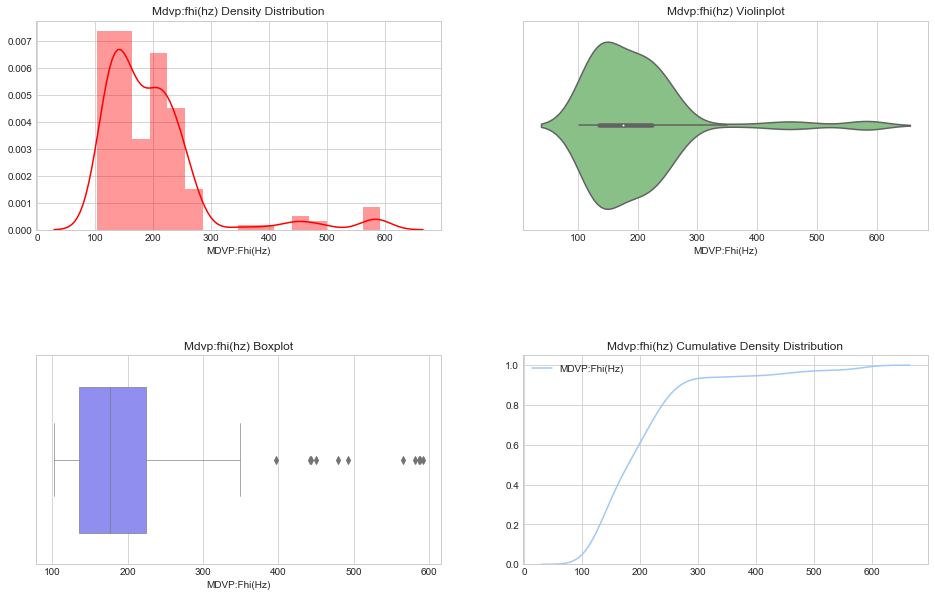

In [16]:
# MDVP:Fhi(Hz) - is the Maximum vocal fundamental frequency of the subject.
summary('MDVP:Fhi(Hz)')

 - MDVP:Fhi(Hz) is left - skewed with a median of 175.829Hz, and there are outlier values to the right extreme.

5 Point Summary of Spread1 Attribute:
Spread1(min) : -7.964983999999999
Q1                    : -6.450096
Q2(Median)            : -5.720868
Q3                    : -5.046192
Spread1(max) : -2.434031


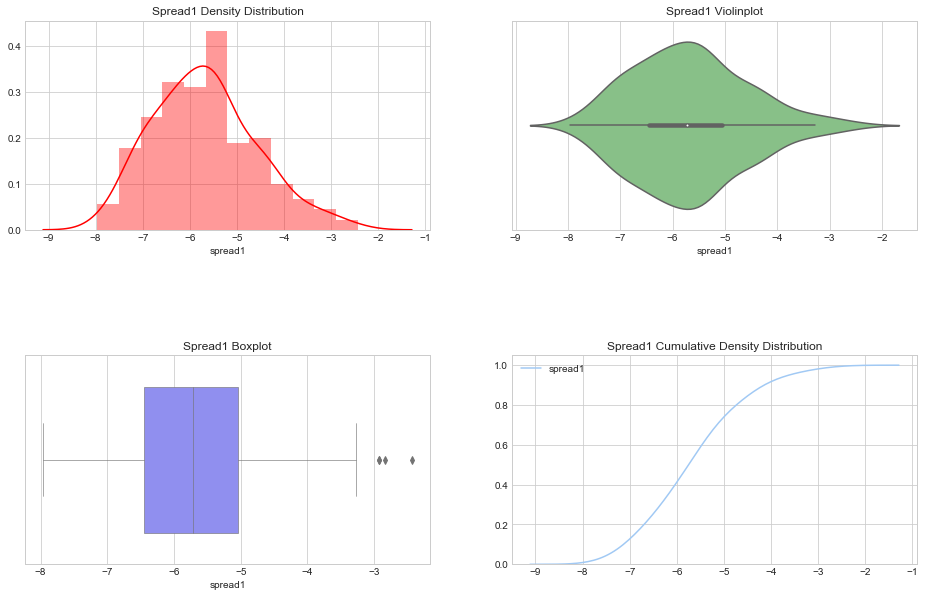

In [17]:
# PPE, Spread1 and Spread2 are three non-linear measures of fundamental frequency variation. Let's check the nature of distribution of these variables more closely.
summary('spread1')

5 Point Summary of Spread2 Attribute:
Spread2(min) : 0.006274
Q1                    : 0.17435050000000002
Q2(Median)            : 0.218885
Q3                    : 0.279234
Spread2(max) : 0.45049300000000003


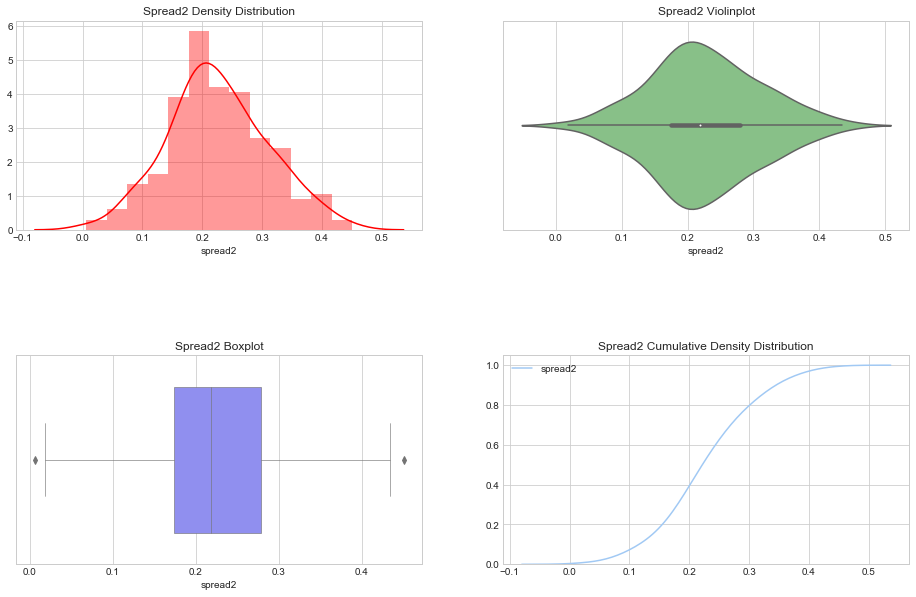

In [18]:
summary('spread2')

5 Point Summary of Ppe Attribute:
Ppe(min) : 0.044538999999999995
Q1                    : 0.137451
Q2(Median)            : 0.194052
Q3                    : 0.25298
Ppe(max) : 0.527367


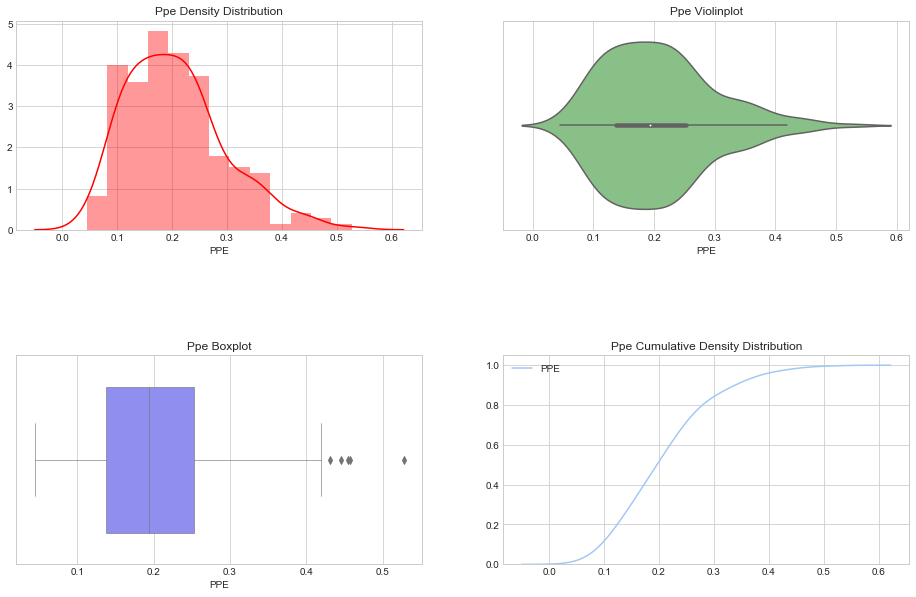

In [19]:
summary('PPE')

 - spread1 and spread2 have disributions close to a normal distribution. PPE is slightly left skewed, with a few outlier values to the right extreme.

In [20]:
# Let's Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    d = data['status'].value_counts()

    splot = ax[1].bar(x = d.index, height = d.values)

    for p in splot.patches:
        ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Count')
    ax[1].set_title(f'Status Bar Graph')


    fig.tight_layout()
    plt.show()

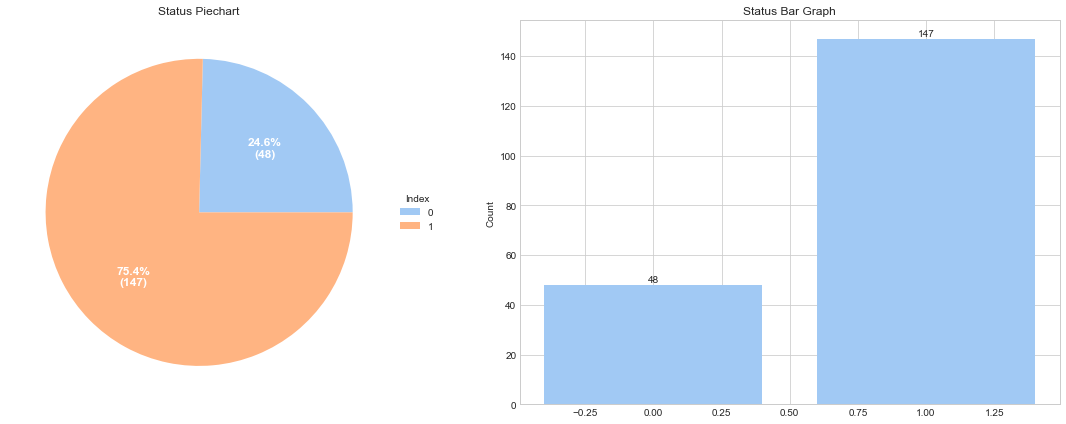

In [21]:
cat_view('status')

### 2.3.2 Multivariate Analysis

In [22]:
X = predictors
y = labels

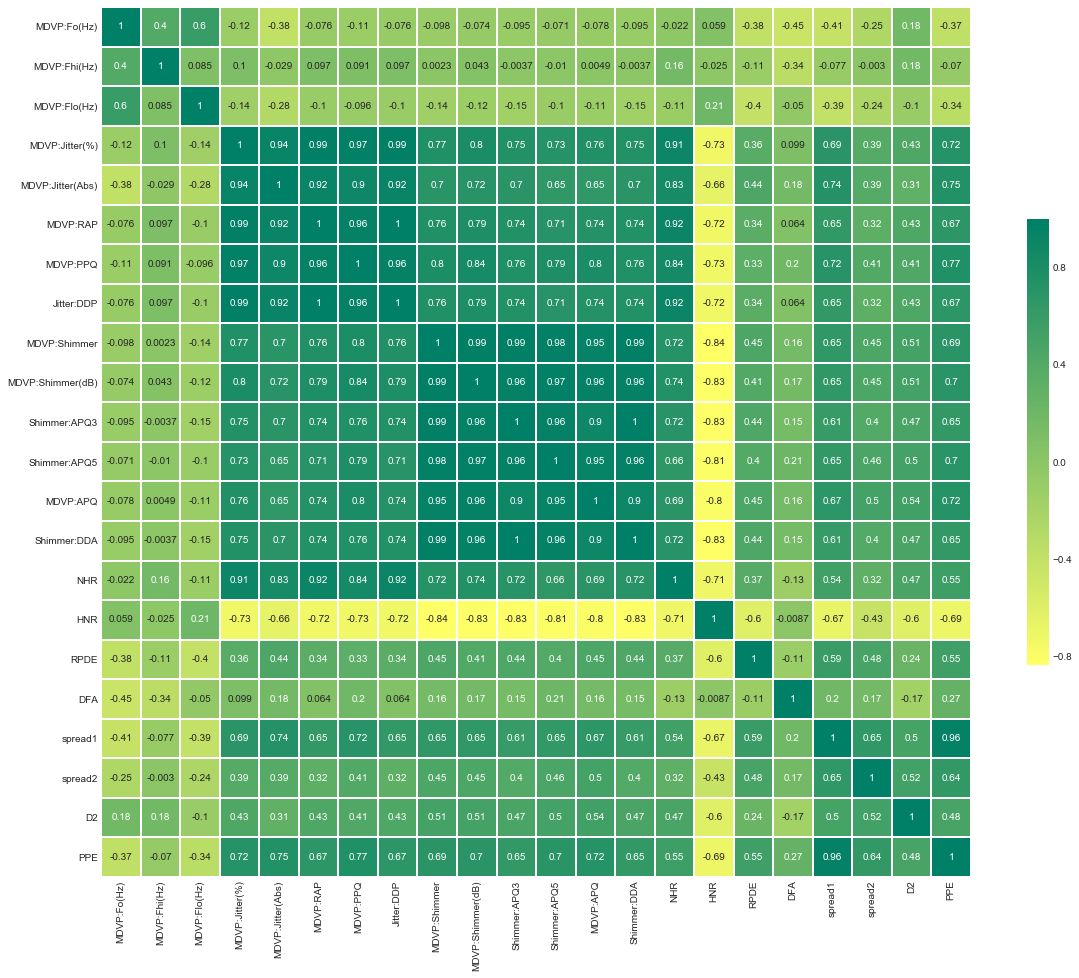

In [23]:
corr = X.corr()
plt.figure(figsize=(20,16))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

 - The dataset shows severe multi-collinearity between various features, however we need to understand which of these features are the most important ones in order to process the data accordingly, or maybe drop certain features as appropriate.
 - Let's check which of the variables show strong correlation with the target variable.

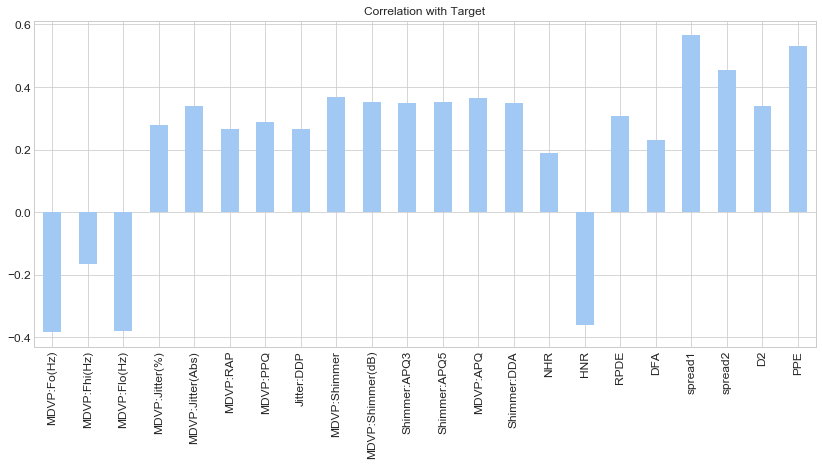

In [24]:
predictors.corrwith(data['status']).plot.bar(figsize = (14, 6), title = "Correlation with Target", fontsize = 12, rot = 90, grid = True)

 - It seems the variables 'spread1', 'spread2' and 'PPE' (measures of fundamental frequency variation) show positive correlation with the target, while the measures of vocal fundamental frequency (MDVP:Fo, MDVP:Flo, MDVP:Fhi) show negative correlation with the target.
 - The variable 'HNR' (a ratio of noise to tonal components in the voice) also has a correlation with the target.

In [25]:
# Let's check pairwise relationship between all the variables.
# Commenting because it takes a long time to generate the pairgrid.
# sns.pairplot(data)

 - As we discovered in our correlation study, there are some strong correlations between features. However before dropping variables, we would like to understand feature importance for various features.

# 3. Data Preprocessing
## 3.1 Train - Test Split

In [26]:
X = predictors
y = labels

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)
X_train.shape

(136, 22)

## 3.2 Feature Importance
 - In order to understand the importance of various features, let's quickly train a Random Forest classifier to make use of the inbuilt 'Feature Importance'.

Text(0.5, 0, 'Relative Importance')

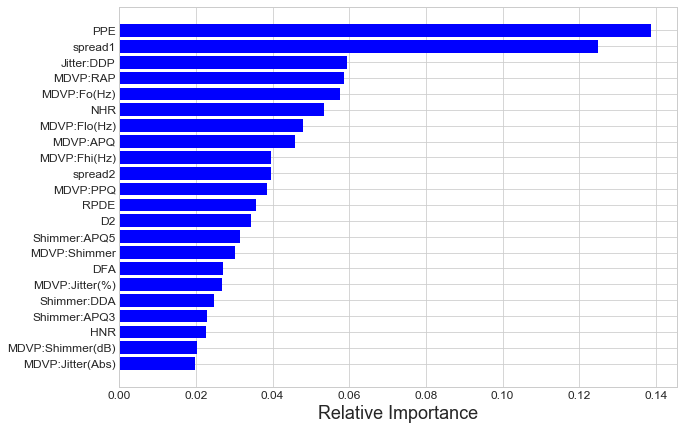

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

- From the graph, it is not too obvious whether we should drop certain variables, even though we know some weak predictors (MDVP:Shimmer(dB) ) is strongly correlated with some of the important predictors (MDVP : APQ).
- Instead, let's turn to PCA and see if we can compress the data to a lower number of important components without losing too much information.

## 3.3 PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [30]:
cumsum

array([0.73442271, 0.94577117, 0.99816273, 0.99995414, 0.99999093,
       0.99999792, 0.99999904, 0.99999954, 0.9999998 , 0.99999991,
       0.99999996, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

 - It seems that with just 2 Principle components, we are able to explain 94.57% of the variance in the data. At 13 components, we practically lose no information and at the same time lower the number of variables we need to manage.

In [31]:
d

3

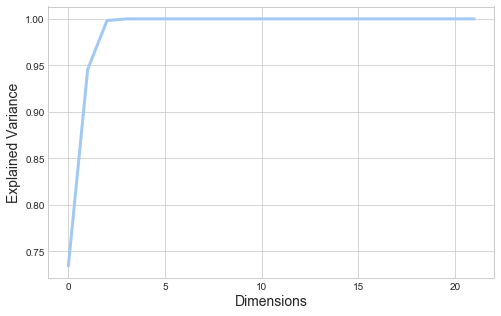

In [32]:
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions", fontsize = 14)
plt.ylabel("Explained Variance", fontsize = 14)
plt.grid(True)

plt.show()

 - Let's try to visualize the nature of the data by plotting the data in just 2 principle components.

In [33]:
X_train = X_train.values
y_train = y_train.values

In [34]:
X_train.shape

(136, 22)

In [35]:
y_train.shape

(136, 1)

In [36]:
y_train.dtype

dtype('int64')

In [37]:
# Standard Scalar transformation is necessary to get a good understanding through visualization.
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)

In [38]:
pca = PCA(2)  # project from 22 to 2 dimensions
X_pca = pca.fit_transform(X_train_std)
print(X_train_std.shape)
print(X_pca.shape)

(136, 22)
(136, 2)


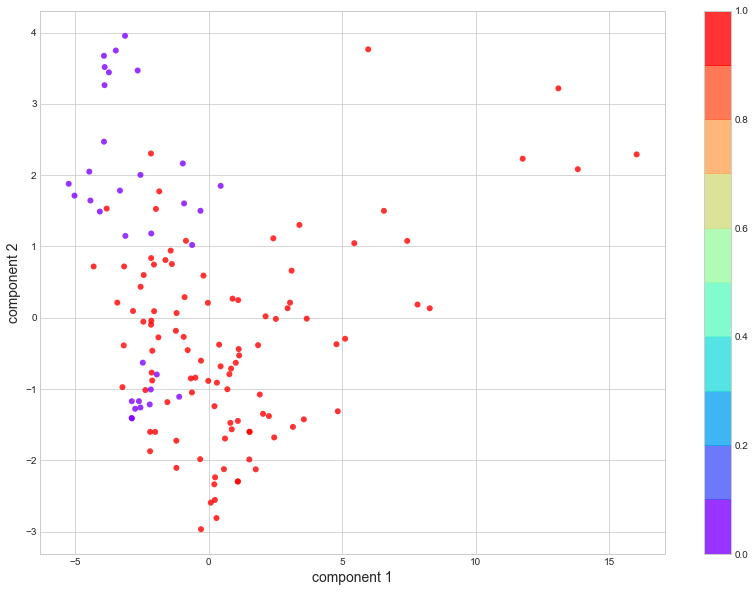

In [39]:
plt.figure(figsize=(14,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y_train[:,0], edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1', fontsize = 14)
plt.ylabel('component 2', fontsize = 14)
plt.colorbar();

 - We can see the spread of the data in 2 components, but the clusters are not too clear.
 - Let's use t-SNE to visualize the data in 2 dimensions.

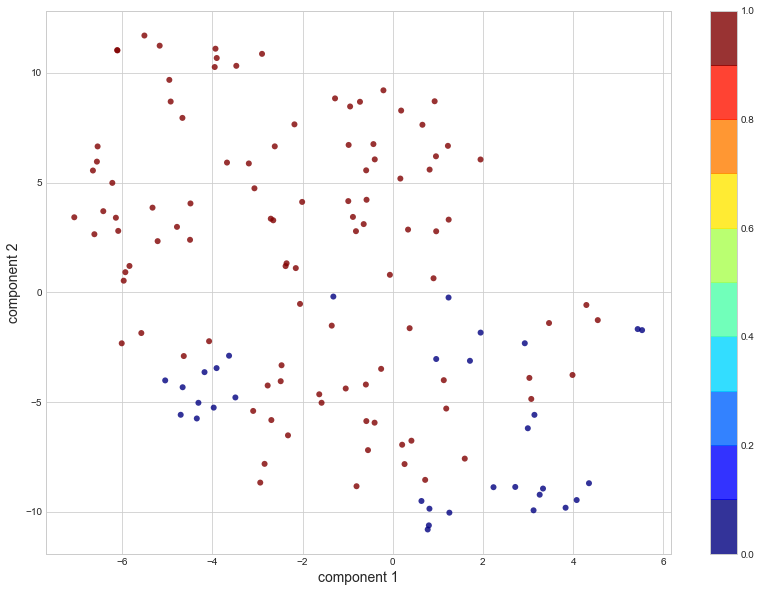

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_std)

plt.figure(figsize=(14,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=y_train[:,0], edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1', fontsize = 14)
plt.ylabel('component 2', fontsize = 14)
plt.colorbar()
plt.show()

 - Slightly better than PCA.

## 3.4 Transformation Pipeline

In [41]:
# Let's create a simple transformation pipeline to trnsform the train and test data. We do not need to worry about any missing or null data.
from sklearn.pipeline import make_pipeline
np.random.seed(42)

transformer = make_pipeline(StandardScaler(), PCA(n_components=13))
X_train_std = transformer.fit_transform(X_train)

In [42]:
X_train_std[0]

array([-2.6115697 , -1.16903943,  1.13874625, -0.31757629, -0.04877178,
        0.39387941,  0.12608654, -0.55471292,  0.3823185 , -0.14082182,
       -0.1146827 , -0.57248887,  0.1739979 ])

# 4. Training Models

## 4.1 Training Individual Models

In [43]:
# Let's create a simple fiunction to train several standard classifiers, and return their accuracy, precision, recall and f1 score after cross - validation.
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
np.random.seed(42)


def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train_std, y_train, cv=5)
    cm = confusion_matrix(y_train, y_train_pred)
    print('Confusion matrix: ' + model[0])
    print(cm)
    print()
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    
    return accuracy, precision, recall, f1

In [44]:
nb_clf = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_f1_score = train_model(('Gaussian Naive Bayes', nb_clf))

Confusion matrix: Gaussian Naive Bayes
[[25  8]
 [14 89]]



In [45]:
lr_clf = LogisticRegression(solver="liblinear")
lr_accuracy, lr_recall, lr_precision, lr_f1_score = train_model(('Logistic Regression', lr_clf))

Confusion matrix: Logistic Regression
[[19 14]
 [ 9 94]]



In [46]:
sgd_clf = SGDClassifier(random_state=42)
sgd_accuracy, sgd_recall, sgd_precision, sgd_f1_score = train_model(('SGD Classifier', sgd_clf))

Confusion matrix: SGD Classifier
[[23 10]
 [16 87]]



In [47]:
knn_clf = KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )
knn_accuracy, knn_recall, knn_precision, knn_f1_score = train_model(('k Nearest Neighbor', knn_clf))

Confusion matrix: k Nearest Neighbor
[[27  6]
 [ 7 96]]



In [48]:
sv_clf = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_f1_score = train_model(('SVM Classifier', sv_clf))

Confusion matrix: SVM Classifier
[[ 14  19]
 [  1 102]]



In [49]:
result1 = pd.DataFrame({'Model' : ['Naive Bayes', 'Logistic Regression', 'SGD', 'KNN', 'SVM'],
                      'Accuracy': [ nb_accuracy ,  lr_accuracy, sgd_accuracy, knn_accuracy ,  svm_accuracy ],
                      'Recall' : [nb_recall ,  lr_recall, sgd_recall, knn_recall ,  svm_recall ],
                      'Precision': [nb_precision ,  lr_precision, sgd_precision, knn_precision ,  svm_precision ],
                      'F1 Score' : [nb_f1_score ,  lr_f1_score, sgd_f1_score, knn_f1_score ,  svm_f1_score]})
 
result1.sort_values(by=['Accuracy', 'F1 Score'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Model  Accuracy    Recall  Precision  F1 Score
3                  KNN  0.904412  0.941176   0.932039  0.936585
4                  SVM  0.852941  0.842975   0.990291  0.910714
0          Naive Bayes  0.838235  0.917526   0.864078  0.890000
1  Logistic Regression  0.830882  0.870370   0.912621  0.890995
2                  SGD  0.808824  0.896907   0.844660  0.870000

## 4.2 Training Standard Ensemble Models
 - Let's train a few ensemble models by first finding optimal parameters for the classifier through grid search, and then training the best estimator on the training data.
 
### 4.2.1 Bagging Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

bg_grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = 'f1')

bg_fit = bg_grid_search.fit(X_train_std, y_train)

bg_clf = bg_fit.best_estimator_
print (bg_clf)

D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [51]:
bg_accuracy, bg_recall, bg_precision, bg_f1_score = train_model(('Bagging Classifier', bg_clf))

Confusion matrix: Bagging Classifier
[[13 20]
 [ 4 99]]



### 4.2.2 Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)

rf_fit = rf_grid_search.fit(X_train_std, y_train)
rf_clf = rf_fit.best_estimator_
print(rf_clf)

D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)


In [53]:
rf_accuracy, rf_recall, rf_precision, rf_f1_score = train_model(('Random Forest Classifier', rf_clf))

Confusion matrix: Random Forest Classifier
[[20 13]
 [ 5 98]]



### 4.2.3 AdaBoost

In [54]:
from sklearn.ensemble import AdaBoostClassifier

param_grid={'n_estimators':[50,100,200],
            'learning_rate':[.001,0.01,.1]}

ada = AdaBoostClassifier()
ab_grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv= 5)

ab_fit = ab_grid_search.fit(X_train_std, y_train)
ab_clf = ab_fit.best_estimator_
print(ab_clf)

D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)


In [55]:
ab_accuracy, ab_recall, ab_precision, ab_f1_score = train_model(('AdaBoost Classifier', ab_clf))

Confusion matrix: AdaBoost Classifier
[[23 10]
 [ 8 95]]



In [56]:
result2 = pd.DataFrame({'Model' : ['Random Forest', 'AdaBoost', 'Bagging'],
                      'Accuracy': [ rf_accuracy, ab_accuracy, bg_accuracy ],
                      'Recall' : [rf_recall , ab_recall, bg_recall ],
                      'Precision': [rf_precision , ab_precision, bg_precision ],
                      'F1 Score' : [rf_f1_score, ab_f1_score, bg_f1_score]})
 
result2.sort_values(by=['Accuracy', 'F1 Score'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Model  Accuracy    Recall  Precision  F1 Score
0  Random Forest  0.867647  0.882883   0.951456  0.915888
1       AdaBoost  0.867647  0.904762   0.922330  0.913462
2        Bagging  0.823529  0.831933   0.961165  0.891892

In [57]:
result1.set_index('Model', inplace = True)
result2.set_index('Model', inplace = True)

In [58]:
all_models = pd.concat([result1, result2])
all_models.sort_values(by=['Accuracy', 'F1 Score'], axis=0, ascending=False, kind='quicksort')

Accuracy    Recall  Precision  F1 Score
Model                                                       
KNN                  0.904412  0.941176   0.932039  0.936585
Random Forest        0.867647  0.882883   0.951456  0.915888
AdaBoost             0.867647  0.904762   0.922330  0.913462
SVM                  0.852941  0.842975   0.990291  0.910714
Naive Bayes          0.838235  0.917526   0.864078  0.890000
Logistic Regression  0.830882  0.870370   0.912621  0.890995
Bagging              0.823529  0.831933   0.961165  0.891892
SGD                  0.808824  0.896907   0.844660  0.870000

In [59]:
from sklearn.metrics import accuracy_score

X_test_std = transformer.fit_transform(X_test.values)

In [60]:
knn_clf.fit(X_train_std, y_train)

y_pred = knn_clf.predict(X_test_std)

knn_score = accuracy_score(y_test, y_pred)
print(f'kNN Classifier Test Accuracy: {knn_score:.4f}')

kNN Classifier Test Accuracy: 0.7627


In [61]:
sv_clf.fit(X_train_std, y_train)

y_pred = sv_clf.predict(X_test_std)

sv_score = accuracy_score(y_test, y_pred)
print(f'SV Classifier Test Accuracy: {sv_score:.4f}')

SV Classifier Test Accuracy: 0.6780


In [62]:
rf_clf.fit(X_train_std, y_train)

y_pred = rf_clf.predict(X_test_std)

rf_score = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Test Accuracy: {rf_score:.4f}')

Random Forest Classifier Test Accuracy: 0.7627


In [63]:
ab_clf.fit(X_train_std, y_train)

y_pred = ab_clf.predict(X_test_std)

ab_score = accuracy_score(y_test, y_pred)
print(f'AdaBoost Classifier Test Accuracy: {ab_score:.4f}')

AdaBoost Classifier Test Accuracy: 0.7119


## 4.3 Training a Meta - Classifier
 - In order to train a meta classifier, we need to select several estimators. The following is a handy function that helps select the best estimator of a given type through grid search.

In [64]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        # columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = ['estimator', 'mean_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

models1 = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'BaggingClassifier': BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, bootstrap=True, oob_score=True),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'KNeighborsClassifier': {'n_neighbors':[3, 5, 7], 'algorithm':['auto', 'kd_tree']},
    'BaggingClassifier': {'max_samples' : [0.5, 0.6, 0.7]},
    'ExtraTreesClassifier': { 'n_estimators': [30, 50, 100] },
    'RandomForestClassifier': { 'n_estimators': [30, 50, 100] },
    'AdaBoostClassifier':  { 'n_estimators': [30, 50, 100] },
    'GradientBoostingClassifier': { 'n_estimators': [30, 50, 100], 'learning_rate': [0.8, 1.0]},
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.01, 0.001, 0.0001]},
    ]
}

In [66]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train_std, y_train, scoring='f1', n_jobs=-1)

Running GridSearchCV for KNeighborsClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for BaggingClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.0s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.9s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.9s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for SVC.
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
helper1.score_summary(sort_by='mean_score')

KNeighborsClassifier
BaggingClassifier
ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator mean_score   std_score    C algorithm   gamma  \
10        ExtraTreesClassifier   0.938087   0.0089903  NaN       NaN     NaN   
0         KNeighborsClassifier   0.931482   0.0263116  NaN      auto     NaN   
3         KNeighborsClassifier   0.931482   0.0263116  NaN   kd_tree     NaN   
11        ExtraTreesClassifier   0.930534  0.00911261  NaN       NaN     NaN   
1         KNeighborsClassifier   0.923913   0.0242149  NaN      auto     NaN   
4         KNeighborsClassifier   0.923913   0.0242149  NaN   kd_tree     NaN   
9         ExtraTreesClassifier    0.92157  0.00727622  NaN       NaN     NaN   
14      RandomForestClassifier   0.921182   0.0105651  NaN       NaN     NaN   
12      RandomForestClassifier    0.92029   0.0232521  NaN       NaN     NaN   
29                         SVC   0.912599   0.0253878   10       NaN    0.01   
13      RandomForestClassifier   0.908475    0.024222  NaN       NaN     NaN   
6            BaggingClassifier   0.905581   0.0270275  NaN       NaN     NaN   
30                         SVC   0.905415   0.0202593   10       NaN   0.001   
26                         SVC   0.902198   0.0259478    1       NaN    0.01   
5         KNeighborsClassifier   0.901129   0.0315463  NaN   kd_tree     NaN   
2         KNeighborsClassifier   0.901129   0.0315463  NaN      auto     NaN   
20  GradientBoostingClassifier   0.900968   0.0404595  NaN       NaN     NaN   
16          AdaBoostClassifier   0.900184   0.0407307  NaN       NaN     NaN   
17          AdaBoostClassifier   0.898959    0.047834  NaN       NaN     NaN   
18  GradientBoostingClassifier   0.897415   0.0381959  NaN       NaN     NaN   
21  GradientBoostingClassifier   0.896665   0.0377858  NaN       NaN     NaN   
7            BaggingClassifier   0.895691   0.0134481  NaN       NaN     NaN   
8            BaggingClassifier   0.895623   0.0245987  NaN       NaN     NaN   
25                         SVC   0.893941   0.0405857   10       NaN     NaN   
19  GradientBoostingClassifier   0.893331   0.0362855  NaN       NaN     NaN   
22  GradientBoostingClassifier   0.891567    0.033826  NaN       NaN     NaN   
23  GradientBoostingClassifier   0.891567    0.033826  NaN       NaN     NaN   
24                         SVC   0.880009   0.0484176    1       NaN     NaN   
15          AdaBoostClassifier   0.872561   0.0589711  NaN       NaN     NaN   
27                         SVC   0.861906  0.00162071    1       NaN   0.001   
28                         SVC   0.861906  0.00162071    1       NaN  0.0001   
31                         SVC   0.861906  0.00162071   10       NaN  0.0001   

    kernel learning_rate max_samples max_score min_score n_estimators  \
10     NaN           NaN         NaN  0.944444  0.925373           50   
0      NaN           NaN         NaN  0.957746  0.895522          NaN   
3      NaN           NaN         NaN  0.957746  0.895522          NaN   
11     NaN           NaN         NaN  0.941176  0.918919          100   
1      NaN           NaN         NaN  0.956522  0.898551          NaN   
4      NaN           NaN         NaN  0.956522  0.898551          NaN   
9      NaN           NaN         NaN  0.931507  0.914286           30   
14     NaN           NaN         NaN  0.931507  0.906667          100   
12     NaN           NaN         NaN  0.944444  0.888889           30   
29     rbf           NaN         NaN  0.931507  0.876712          NaN   
13     NaN           NaN         NaN  0.931507     0.875           50   
6      NaN           NaN         0.5  0.939394  0.873239          NaN   
30     rbf           NaN         NaN  0.929577      0.88          NaN   
26     rbf           NaN         NaN  0.931507  0.868421          NaN   
5      NaN           NaN         NaN  0.929577  0.857143          NaN   
2      NaN           NaN         NaN  0.929577  0.857143          NaN   
20     NaN           0.8         NaN  0.929577   0.84375          100   
16     NaN           NaN         NaN  0.957746  0.869565          

In [68]:
# !pip install mlxtend

In [69]:
# Let's build a Stacking classifier with logistic regression as a meta-classifier.
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier

knnc = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(random_state=1, n_estimators = 50)
nbc = GaussianNB()
abc = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
bgc = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
lrc = LogisticRegression(solver = 'liblinear')

sclf = StackingClassifier(classifiers=[knnc, rfc, nbc, abc, bgc], 
                          meta_classifier=lrc, use_probas=True)

print('3-fold cross validation:\n')

for clf, label in zip([knnc, rfc, nbc, abc, bgc, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'AdaBoost',
                       'Bagging',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.76 (+/- 0.06) [KNN]
Accuracy: 0.82 (+/- 0.06) [Random Forest]
Accuracy: 0.68 (+/- 0.01) [Naive Bayes]
Accuracy: 0.79 (+/- 0.04) [AdaBoost]
Accuracy: 0.82 (+/- 0.04) [Bagging]
Accuracy: 0.84 (+/- 0.06) [StackingClassifier]


In [70]:
sclf.fit(X_train_std, y_train)

y_pred = sclf.predict(X_test_std)

stacking_score = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {stacking_score:.4f}')

Stacking Classifier Accuracy: 0.7458


 - The Stacking classifier performs slightly better overall than our individual models, but kNN classifier still outperforms it in the test set.

In [71]:
from sklearn.ensemble import VotingClassifier

kn_clf = KNeighborsClassifier(n_neighbors=5),
bg_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True),
et_clf = ExtraTreesClassifier(n_estimators = 50),
rf_clf = RandomForestClassifier(n_estimators = 100),
ab_clf = AdaBoostClassifier(n_estimators= 50),
sv_clf = SVC(C = 10, kernel = 'rbf')


estimator = []
estimator.append(('kn_clf', KNeighborsClassifier(n_neighbors=5)))
estimator.append(('bg_clf', BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True)))
estimator.append(('et_clf', ExtraTreesClassifier(n_estimators = 50)))
estimator.append(('rf_clf', RandomForestClassifier(n_estimators = 100)))
estimator.append(('ab_clf', AdaBoostClassifier(n_estimators= 50)))
estimator.append(('sv_clf', SVC(C = 10, kernel = 'rbf', probability = True)))


voting_clf_hard = VotingClassifier(estimators = estimator, voting='hard')
voting_clf_soft = VotingClassifier(estimators = estimator, voting='soft')

In [72]:
voting_clf_hard.fit(X_train_std, y_train)

VotingClassifier(estimators=[('kn_clf',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('bg_clf',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                        

In [73]:
y_pred = voting_clf_hard.predict(X_test_std)
score = accuracy_score(y_test, y_pred, normalize = True) 
print(score)

0.8135593220338984


In [74]:
voting_clf_soft.fit(X_train_std, y_train)
y_pred = voting_clf_soft.predict(X_test_std)
score = accuracy_score(y_test, y_pred, normalize = True) 
print(score)

0.7288135593220338


 - Hard voting classifiers perform better than most individual classifiers. The hard voting classifier seems to be the best choice among all the classifiers trained. 